### Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler 

In [2]:
# Loading our data:
df = pd.read_csv("student_clustering.csv")
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


### Data preprocessing and analysis

In [3]:
# check for number of cloumns and rows:
df.shape

(200, 2)

In [4]:
# Statistical summary:
df.describe().round()

,cgpa,iq
count,200.0,200.0
mean,7.0,102.0
std,2.0,12.0
min,5.0,83.0
25%,5.0,91.0
50%,7.0,102.0
75%,9.0,113.0
max,9.0,121.0


In [5]:
# more information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [6]:
# check for missing values:
df.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [7]:
#check for duplicated values:
df.duplicated().sum()

7

In [8]:
# drop duplicated values:

df.drop_duplicates(inplace=True)
# check again for duplicated values:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['cgpa', 'iq'], dtype='object')

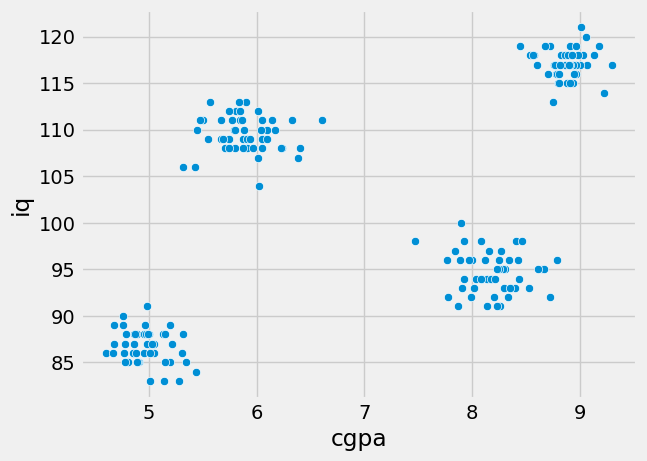

In [10]:
# plotting the data
sns.scatterplot(x="cgpa",y="iq", data=df)
plt.show()

#### As we see above, it is clear that we should have four clusters, But to be more certain we will use the wcss and the elbow graph to show the best number of clusters we should have.

### Preprocessing for machine learning:


In [11]:
df.columns

Index(['cgpa', 'iq'], dtype='object')

In [12]:
# creating the "x" value that will be used for our model:
x = df.values
print(x)

[[  5.13  88.  ]
 [  5.9  113.  ]
 [  8.36  93.  ]
 [  8.27  97.  ]
 [  5.45 110.  ]
 [  5.88 109.  ]
 [  8.41  98.  ]
 [  8.8  115.  ]
 [  5.79 110.  ]
 [  8.09  94.  ]
 [  4.6   86.  ]
 [  6.1  110.  ]
 [  8.16  97.  ]
 [  5.    88.  ]
 [  5.71 108.  ]
 [  8.31  95.  ]
 [  5.5  111.  ]
 [  7.87  91.  ]
 [  6.05 111.  ]
 [  5.84 113.  ]
 [  7.47  98.  ]
 [  4.86  86.  ]
 [  7.78  92.  ]
 [  4.78  87.  ]
 [  4.96  88.  ]
 [  7.93  98.  ]
 [  4.86  87.  ]
 [  9.18 119.  ]
 [  8.04  94.  ]
 [  5.43 106.  ]
 [  8.86 117.  ]
 [  6.01 112.  ]
 [  8.83 118.  ]
 [  5.32 106.  ]
 [  7.77  96.  ]
 [  8.    96.  ]
 [  8.56 118.  ]
 [  5.91 108.  ]
 [  5.44  84.  ]
 [  5.57 113.  ]
 [  5.34  85.  ]
 [  8.43  96.  ]
 [  8.02  93.  ]
 [  5.31  86.  ]
 [  8.96 116.  ]
 [  8.78 116.  ]
 [  8.14  94.  ]
 [  6.4  108.  ]
 [  8.45 119.  ]
 [  5.67 109.  ]
 [  5.14  83.  ]
 [  4.95  86.  ]
 [  8.79 116.  ]
 [  8.12  96.  ]
 [  8.81 115.  ]
 [  6.05 108.  ]
 [  5.85 111.  ]
 [  8.88 115.  ]
 [  5.87 109. 

### choosing number of clusters:

In [13]:
# we will use the WCSS to choose the right number of clusters:
# we will choose the number of clusters with the lowest possible "WCSS" value.

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

C:\Users\User\anaconda4new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


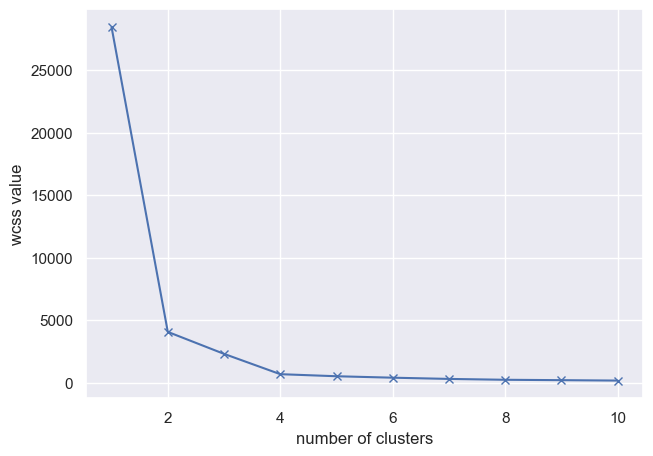

In [14]:
# Plotting the elbow graph:
sns.set()
plt.plot(range(1,11), wcss, marker="x")

plt.xlabel("number of clusters")
plt.ylabel("wcss value");

#### Based on the elbow graph above, the best number of clusters is also (4).

### Training the model:

In [15]:
# we will create a model that will create four clusters:

kmeans = KMeans(n_clusters=4, init="k-means++", random_state=0)


# we also need to return a label for each data point based on their clusters
y = kmeans.fit_predict(x)

print(y)

[3 0 1 1 0 0 1 2 0 1 3 0 1 3 0 1 0 1 0 0 1 3 1 3 3 1 3 2 1 0 2 0 2 0 1 1 2
 0 3 0 3 1 1 3 2 2 1 0 2 0 3 3 2 1 2 0 0 2 0 2 0 1 1 2 3 2 1 3 0 1 0 2 1 3
 0 2 0 2 3 1 1 2 0 3 2 3 2 0 2 0 2 2 1 3 1 1 2 1 3 2 0 3 3 2 3 3 1 3 2 1 0
 0 1 2 1 0 2 3 0 1 2 1 3 1 0 3 1 1 0 3 3 0 2 0 3 1 1 1 3 0 3 2 3 2 0 3 2 3
 2 2 3 1 0 2 0 1 2 0 1 2 3 0 3 3 2 2 0 2 3 3 1 2 0 3 2 0 0 0 1 3 1 1 2 0 1
 3 3 1 3 2 0 0 2]


In [16]:
# adding the clusters to our dataframe:

df["clusters"] = y

df.head()

,cgpa,iq,clusters
0,5.13,88,3
1,5.90,113,0
2,8.36,93,1
3,8.27,97,1
4,5.45,110,0


### Visualizing the clusters:

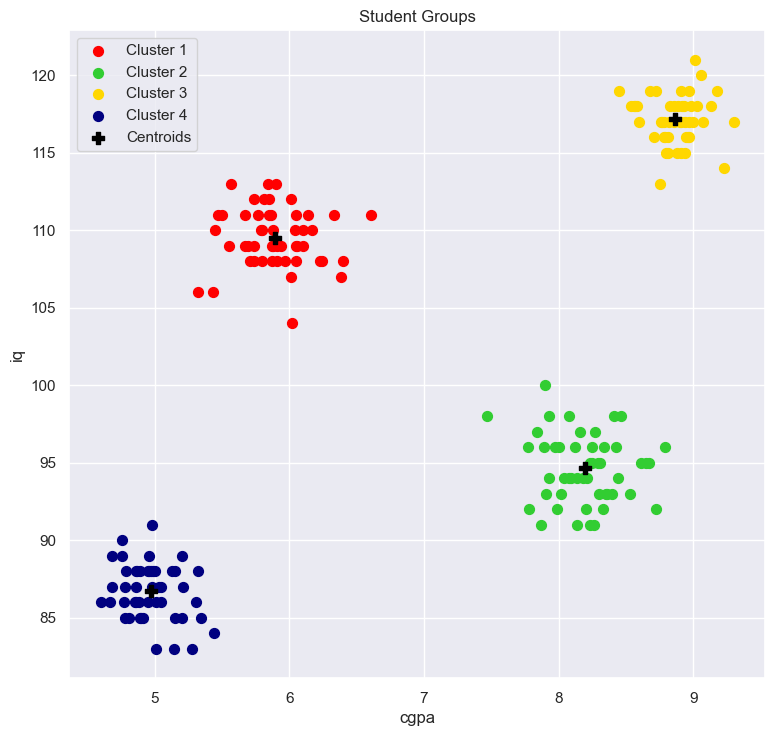

In [17]:
# first: plot all the data point and all clusters:

plt.figure(figsize=(8,8))

plt.scatter(x[y==0,0], x[y==0,1], s=50, c="red", label="Cluster 1")
plt.scatter(x[y==1,0], x[y==1,1], s=50, c="limegreen", label="Cluster 2")
plt.scatter(x[y==2,0], x[y==2,1], s=50, c="gold", label="Cluster 3")
plt.scatter(x[y==3,0], x[y==3,1], s=50, c="navy", label="Cluster 4")


# second: plot the centroids points:

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c="black", label="Centroids",
            marker="P")

plt.title("Student Groups")
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.legend()
plt.show()